<a href="https://www.kaggle.com/code/ahmedalmadami/twitter-depression-classification?scriptVersionId=113041223" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Twitter Depression Classification

## The goal of this project is to gather tweets from twitter, process the data, and model the data using our bench mark algorithms; Decision Tree Classifier, Logistic Regression, Classifier, and SGD Classifier to classify whether a tweet is depressed or non depressed. We will then apply advanced techniques such as Cross-Validation, Feature selection, Ensemble Learning, to optimize our models and get a better accuracy score. Our goal is to successfully improve the accuracy of each model.

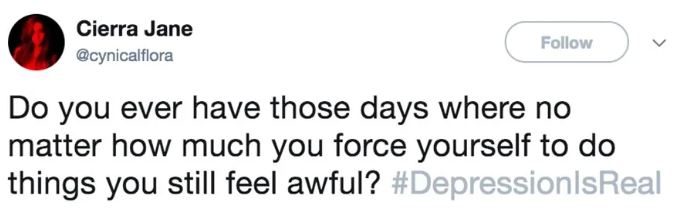

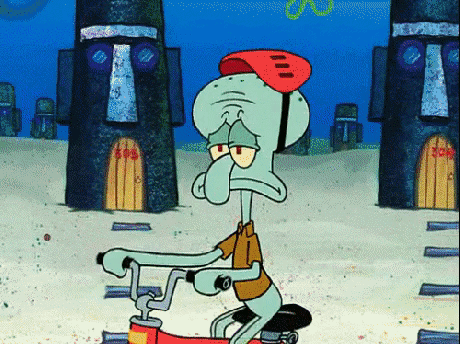

# Data Processing

In [1]:
#import depessed tweets
import pandas as pd
df = pd.read_csv("/kaggle/input/depression-dataset/clean_d_tweets.csv")
df.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets
0,5/16/2020 1:45,the real reason why you be sad you be attach t...,6,1,13731,219,5642
1,4/29/2020 6:42,my biggest problem be overthinking everything,3,6,12583,98,6951
2,4/29/2020 5:48,the worst sadness be the sadness you have teac...,3,5,13350,51,7168
3,4/29/2020 5:47,i cannot make you understand i cannot make any...,3,5,12926,56,8042
4,9/13/2019 0:52,i do not think anyone really understand how ti...,5,0,21160,111,13344


In [2]:
# import non depessed tweets
df2 = pd.read_csv("/kaggle/input/depression-dataset/clean_non_d_tweets.csv")
df2.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets
0,8/9/2021 5:35,touch pass be the new asmr,1,5,22,3,1
1,8/9/2021 4:36,12 years ago i call my dad and he give me some...,1,4,210,8,14
2,8/9/2021 4:28,there be 6500 languages yet i choose to only s...,1,4,564,14,64
3,8/9/2021 4:05,hey everyone ask for a raise today i be tell y...,1,4,1052,28,74
4,8/8/2021 12:56,i invest in 47 startups in a year here be how ...,7,12,2275,65,277


### Label the depressed and non depressed data

In [3]:
# Add a column to df with the label 0 for depressed tweets
df['label'] = 0
df.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets,label
0,5/16/2020 1:45,the real reason why you be sad you be attach t...,6,1,13731,219,5642,0
1,4/29/2020 6:42,my biggest problem be overthinking everything,3,6,12583,98,6951,0
2,4/29/2020 5:48,the worst sadness be the sadness you have teac...,3,5,13350,51,7168,0
3,4/29/2020 5:47,i cannot make you understand i cannot make any...,3,5,12926,56,8042,0
4,9/13/2019 0:52,i do not think anyone really understand how ti...,5,0,21160,111,13344,0


In [4]:
# Add a column to df2 with the label 1 for non depressed tweets
df2['label'] = 1
df2.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets,label
0,8/9/2021 5:35,touch pass be the new asmr,1,5,22,3,1,1
1,8/9/2021 4:36,12 years ago i call my dad and he give me some...,1,4,210,8,14,1
2,8/9/2021 4:28,there be 6500 languages yet i choose to only s...,1,4,564,14,64,1
3,8/9/2021 4:05,hey everyone ask for a raise today i be tell y...,1,4,1052,28,74,1
4,8/8/2021 12:56,i invest in 47 startups in a year here be how ...,7,12,2275,65,277,1


In [5]:
# Add another column labeled depression to df2 with the value non depressed
df2['depression'] = 'non depressed'

# Add another column labeled depression to df with the value depressed
df['depression'] = 'depressed'

df.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets,label,depression
0,5/16/2020 1:45,the real reason why you be sad you be attach t...,6,1,13731,219,5642,0,depressed
1,4/29/2020 6:42,my biggest problem be overthinking everything,3,6,12583,98,6951,0,depressed
2,4/29/2020 5:48,the worst sadness be the sadness you have teac...,3,5,13350,51,7168,0,depressed
3,4/29/2020 5:47,i cannot make you understand i cannot make any...,3,5,12926,56,8042,0,depressed
4,9/13/2019 0:52,i do not think anyone really understand how ti...,5,0,21160,111,13344,0,depressed


### Merge the two DataFrames for Analysis

In [6]:
# Concatenate df and df2
df3 = pd.concat([df, df2], axis=0)
df3.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets,label,depression
0,5/16/2020 1:45,the real reason why you be sad you be attach t...,6,1,13731,219,5642,0,depressed
1,4/29/2020 6:42,my biggest problem be overthinking everything,3,6,12583,98,6951,0,depressed
2,4/29/2020 5:48,the worst sadness be the sadness you have teac...,3,5,13350,51,7168,0,depressed
3,4/29/2020 5:47,i cannot make you understand i cannot make any...,3,5,12926,56,8042,0,depressed
4,9/13/2019 0:52,i do not think anyone really understand how ti...,5,0,21160,111,13344,0,depressed


In [7]:
# check to see if the data is balanced
df3['label'].value_counts()

0    3082
1    3082
Name: label, dtype: int64

In [8]:
# check for missing values
df3.isnull().sum()

date           0
tweet         23
day            0
hour           0
nlikes         0
nreplies       0
nretweets      0
label          0
depression     0
dtype: int64

In [9]:
# drop missing values
df3.dropna(inplace=True)

# Data Visualization

<AxesSubplot:xlabel='hour', ylabel='count'>

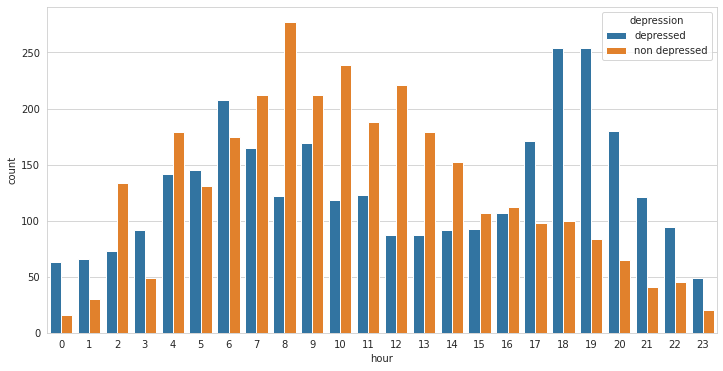

In [10]:
# visualize depression by hour of the day
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df3, hue='depression')

<AxesSubplot:xlabel='day', ylabel='count'>

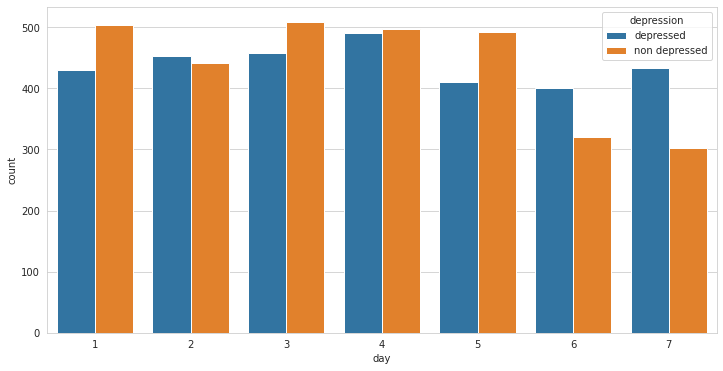

In [11]:
# visualize depression by day of the week
plt.figure(figsize=(12,6))
sns.countplot(x='day', data=df3, hue='depression')

In [12]:
# change the date column to datetime so we can extract the month
df3['date'] = pd.to_datetime(df3['date'])

# extract the month from the date column
df3['month'] = df3['date'].apply(lambda x: x.month)
df3.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets,label,depression,month
0,2020-05-16 01:45:00,the real reason why you be sad you be attach t...,6,1,13731,219,5642,0,depressed,5
1,2020-04-29 06:42:00,my biggest problem be overthinking everything,3,6,12583,98,6951,0,depressed,4
2,2020-04-29 05:48:00,the worst sadness be the sadness you have teac...,3,5,13350,51,7168,0,depressed,4
3,2020-04-29 05:47:00,i cannot make you understand i cannot make any...,3,5,12926,56,8042,0,depressed,4
4,2019-09-13 00:52:00,i do not think anyone really understand how ti...,5,0,21160,111,13344,0,depressed,9


([<matplotlib.axis.XTick at 0x7fd32a14fe10>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

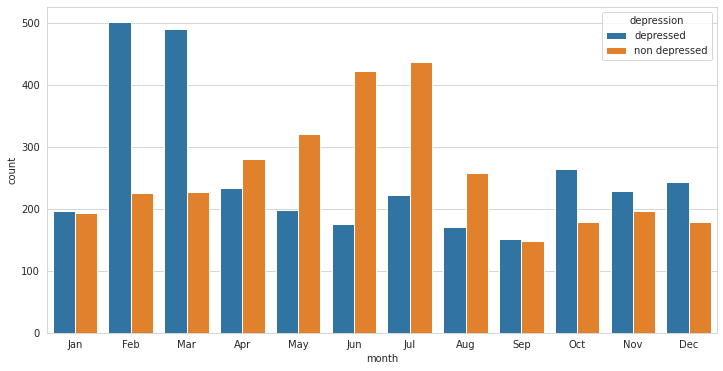

In [13]:
# visualize depression by month
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df3, hue='depression')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

<AxesSubplot:>

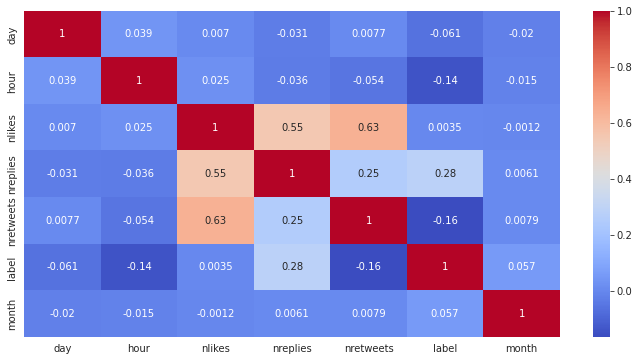

In [14]:
# visualize the correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df3.corr(), cmap='coolwarm', annot=True)

# TF-IDF 

#### TF stands for term frequency and it is the number of times a word appears in a document, IDF stands for inverse document frequency and it is the log of the number of documents divided by the number of documents that contain the word w. 

#### In the case of our data set, the number of documents is the number of tweets and the number of documents that contain the word w is the number of tweets that contain the word w, the tfidf vectorizer will give us a matrix of tfidf scores for each word in each tweet

In [15]:
# Use the TfidfVectorizer to convert the text to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
# tfidf is used to convert the text to a matrix of TF-IDF features
# this is done because the machine learning model cannot work with text directly

# Fit and transform the vectorizer on the text
tfidf.fit(df3['tweet'])
text = tfidf.transform(df3['tweet'])

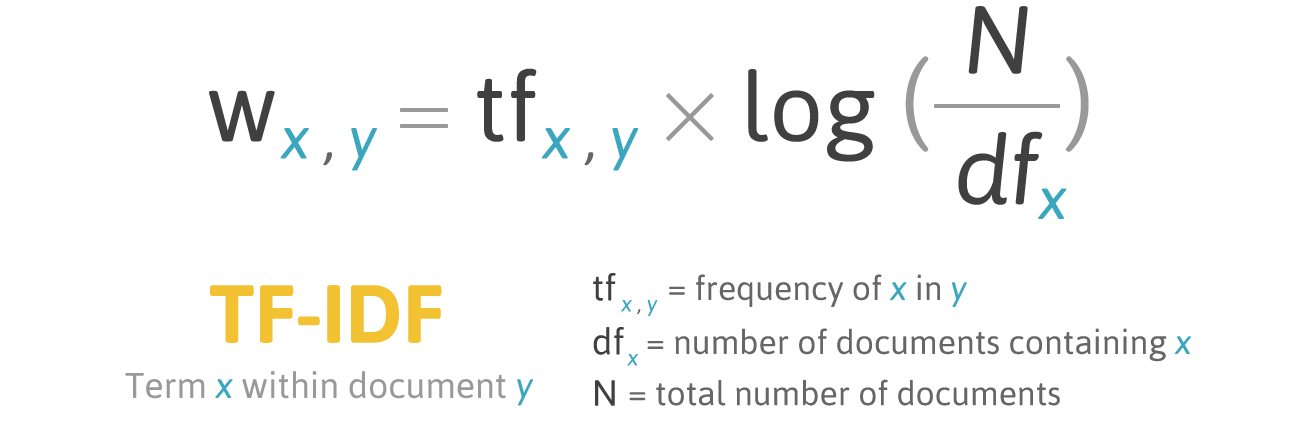

In [16]:
# the tfidf vectorizer removes stop words, punctuation, and converts all text to lowercase
# the tfidf vectorizer also removes words that appear in more than 80% of the documents

# words that were left after the tfidf vectorizer was applied
print(tfidf.get_feature_names_out())

['10' '100' '100m' '11' '12' '13' '15' '16' '18' '1m' '1pm' '20' '2020'
 '21' '2nd' '30' '3am' '3pm' '50' 'ability' 'able' 'absolutely' 'accept'
 'accidentally' 'account' 'achieve' 'act' 'action' 'actually' 'add'
 'admit' 'advance' 'adventure' 'advice' 'affect' 'afraid' 'age' 'ago'
 'agree' 'ahead' 'air' 'alarm' 'alignment' 'alive' 'allow' 'alright'
 'amaze' 'amazon' 'america' 'amp' 'angel' 'anger' 'angry' 'animal'
 'announce' 'annoy' 'answer' 'anti' 'anxiety' 'anybody' 'anymore' 'apart'
 'apologize' 'app' 'appreciate' 'april' 'arm' 'art' 'ask' 'asleep' 'ass'
 'assume' 'attempt' 'attention' 'audio' 'austin' 'available' 'avoid'
 'awake' 'awaken' 'away' 'awesome' 'baby' 'bad' 'badly' 'bake' 'balance'
 'base' 'basically' 'bathroom' 'battery' 'battle' 'bc' 'bear' 'beat'
 'beautiful' 'bed' 'begin' 'believe' 'belong' 'best' 'bet' 'better' 'bf'
 'bianca' 'big' 'bigger' 'biggest' 'billion' 'birthday' 'bitch' 'bitcoin'
 'bite' 'black' 'blame' 'bless' 'blood' 'blur' 'body' 'book' 'bore' 'boss'
 

In [17]:
print(df['tweet'][1])

my biggest problem be overthinking everything


In [18]:
# Show an example of a the TFIDF Vecotrizer in action
print(text[1].toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

### For the tweet, "my biggest problem be overthinking everything" the tfidf vectorizer removed the words "my", "be", and "everything" and converted the word "overthinking" to "overthink, the three words that were left were "overthink", "problem", and "biggest". These three words were given a score as seen above and will be fed into our ML models

****

### TF-IDF allows us to see which words are most important to a document in a collection. In this case,  this will help us see which words are most important to a depressed tweet and which words are most important to a non depressed tweet.

### By evaluating TF-IDF, we understand - How useful a word is to a tweet (which helps us understand the important words with more frequencies in a tweet). This also helps us ignore words that are misspelled (using n-gram technique)

# Begin applying ML Models

In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# X = text and y = label
X_train, X_test, y_train, y_test = train_test_split(text, df3['label'], test_size=0.2, random_state=42)

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Decision Tree Classifier

Accuracy:  0.7436940602115542
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       635
           1       0.78      0.65      0.71       594

    accuracy                           0.74      1229
   macro avg       0.75      0.74      0.74      1229
weighted avg       0.75      0.74      0.74      1229



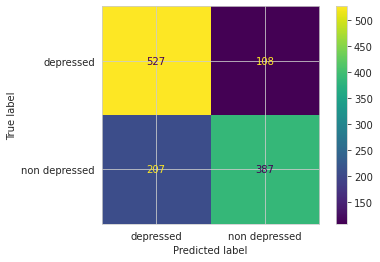

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Accuracy: ", score)


# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['depressed', 'non depressed'])
disp.plot()

In [22]:
# Calculate the False Positive Rate, True Positive Rate, False Negative Rate, and True Negative Rate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)

# In the case of depression, we want to minimize the False Negative Rate
# We want to minimize the number of people who are classified as depressed but are not actually depressed
# That way, we can help those people who are actually depressed

True Negative:  527
False Positive:  108
False Negative:  207
True Positive:  387


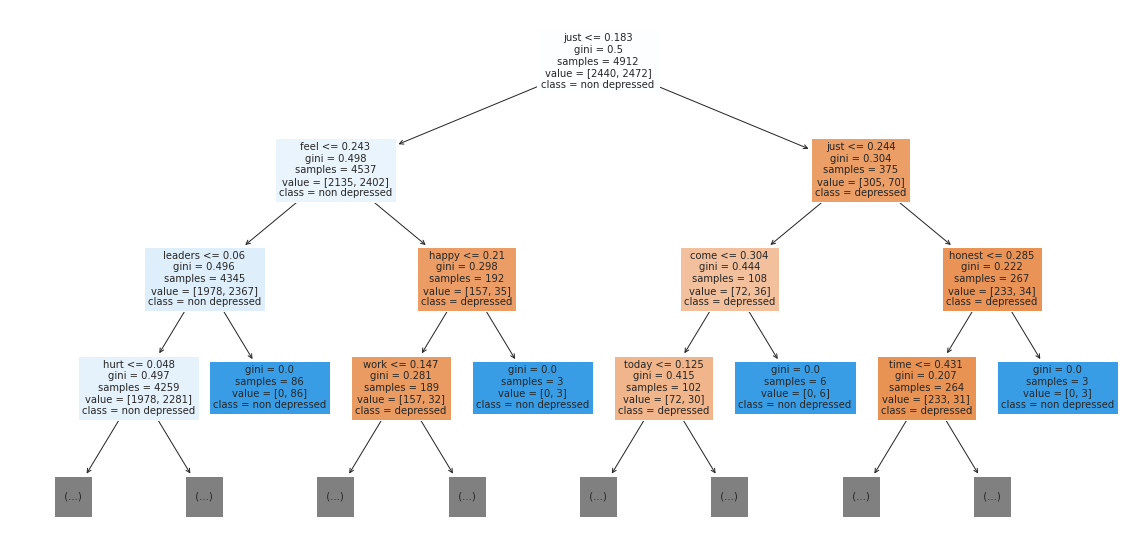

In [23]:
# show first 3 levels of decision tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtree, max_depth=3, fontsize=10, feature_names=tfidf.get_feature_names_out(), class_names=['depressed', 'non depressed'], filled=True)
plt.show()

In [24]:
# Make predictions on a single tweet
tweet = ["Today is going to be a good day"]
tweet = tfidf.transform(tweet).toarray()
print(dtree.predict(tweet)) # 1 = non depressed and 0 = depressed

[1]


In [25]:
# Make predictions on a single tweet
tweet = ["Today I was very tired and stressed out"]
tweet = tfidf.transform(tweet).toarray()
print(dtree.predict(tweet)) # 1 = non depressed and 0 = depressed

[0]


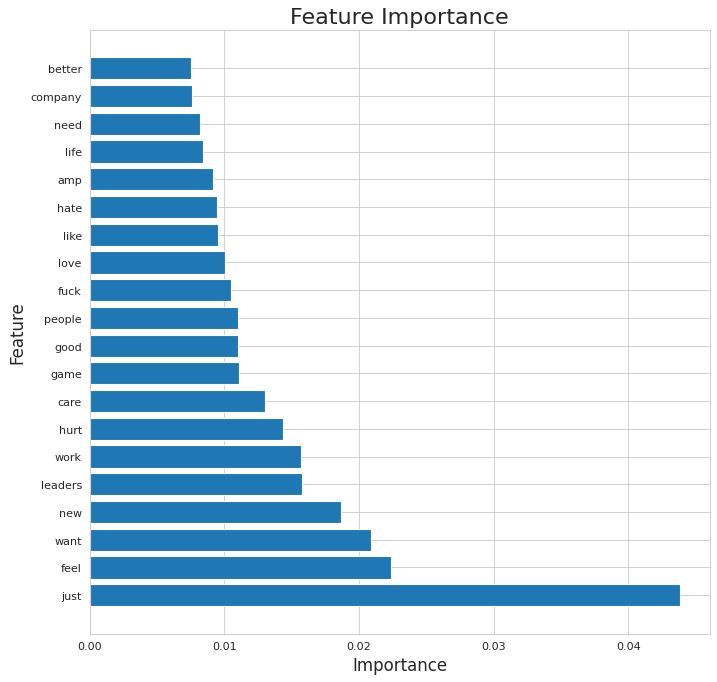

In [26]:
feature_importance = pd.DataFrame(dtree.feature_importances_, index=tfidf.get_feature_names_out(), columns=["importance"]).sort_values('importance', ascending=False)

# Plot the feature importance for the top 20 features
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10), dpi=80, facecolor='w', edgecolor='k', frameon=True, clear=True, subplotpars=None, tight_layout=None)
plt.barh(feature_importance.index[:20], feature_importance['importance'][:20])
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.show()

# Optimize Decision Tree

In [27]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
max_depth = []
min_samples_split = []
acc_gini = []
acc_entropy = []
for i in range(2,20,1):
 dtree_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=i )
 dtree_clf.fit(X_train, y_train)
 y_pred_o = dtree_clf.predict(X_test)
 acc_gini.append(accuracy_score(y_test, y_pred_o))
 ####
 dtree_clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=i)
 dtree_clf.fit(X_train, y_train)
 pred = dtree_clf.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, y_pred_o))
 ####
 min_samples_split.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_samples_split':pd.Series(max_depth)})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [28]:
dtree_clf_score = dtree_clf.score(X_test, y_test)
print("Accuracy: ", dtree_clf_score)

Accuracy:  0.7575264442636289


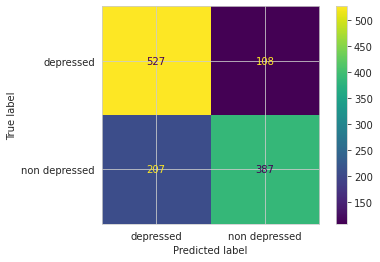

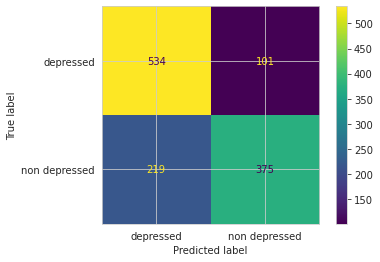

In [29]:
#compare original and new confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['depressed', 'non depressed'])
disp.plot()

cm_o1 = confusion_matrix(y_test, y_pred_o)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_o1, display_labels=['depressed', 'non depressed'])
disp.plot()

**Increased True Positive and Decreased False Positive**

Decision Tree: ROC AUC=0.770


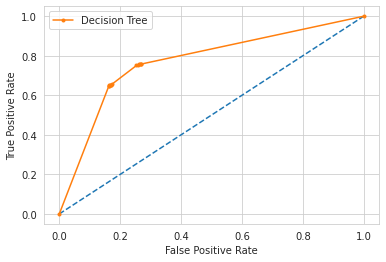

In [30]:
#  plot the roc curve for the decision tree model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
dtree_probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
dtree_probs = dtree_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dtree_auc = roc_auc_score(y_test, dtree_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtree_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(dtree_fpr, dtree_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Increased accuracy from 73.8% to 76.0%**

# Logistic Regression Classifier

Accuracy: 0.822620016273393
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       635
           1       0.79      0.86      0.82       594

    accuracy                           0.82      1229
   macro avg       0.82      0.82      0.82      1229
weighted avg       0.82      0.82      0.82      1229



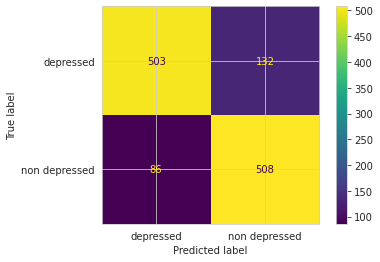

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred2 = lr.predict(X_test)
score2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", score2)

# Print the classification report
print(classification_report(y_test, y_pred2))

# Print the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['depressed', 'non depressed'])
disp2.plot()

In [32]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred2).ravel()
print("True Negative: ", tn2)
print("False Positive: ", fp2)
print("False Negative: ", fn2)
print("True Positive: ", tp2)

True Negative:  503
False Positive:  132
False Negative:  86
True Positive:  508


In [33]:
# Make predictions on a single tweet
tweet = ["Today is going to be a good day"]
tweet = tfidf.transform(tweet).toarray()
print(dtree.predict(tweet)) # 1 = non depressed and 0 = depressed

[1]


In [34]:
# Make predictions on a single tweet
tweet = ["Today I was very tired and stressed out"]
tweet = tfidf.transform(tweet).toarray()
print(dtree.predict(tweet)) # 1 = non depressed and 0 = depressed

[0]


In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt

def make_roc(y_test, y_score):
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)
  auc = metrics.auc(fpr, tpr)
  print("auc: %s"%(auc))
  plt.plot(fpr, tpr, color='darkred', label='roc area:(%0.2f)' % auc)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title('roc_curve')
  plt.legend(loc='lower right')
  plt.show()

# Optimize Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000, 2000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
lr_clf = GridSearchCV(estimator=LogisticRegression(random_state=42, penalty= 'l2'), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
lr_clf.fit(X_train, y_train)
y_pred_o1 = lr_clf.predict(X_test)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


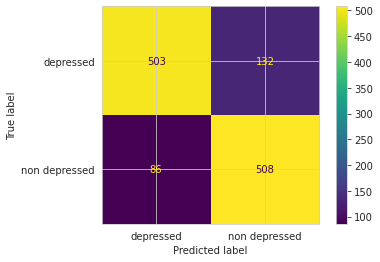

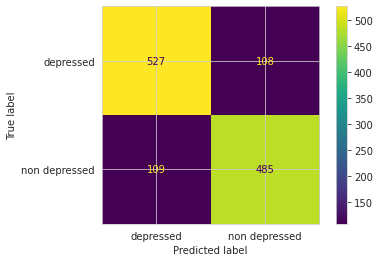

In [37]:
# Print the original confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['depressed', 'non depressed'])
disp2.plot()

#new cm
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_o1), display_labels=['depressed', 'non depressed']).plot()


**Increased True Negative and Decreased False Positive**

auc: 0.9090988626421697


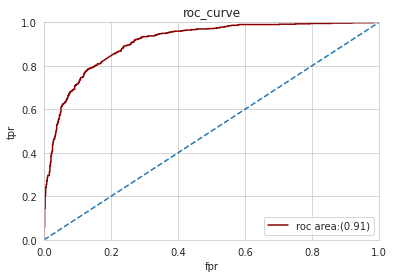

In [38]:
y_score_o2 = lr_clf.decision_function(X_test)
make_roc(y_test,y_score_o2)

In [39]:
score_o2 = accuracy_score(y_test, y_pred_o1)
print("New Logistic Regression Accuracy:", score_o2)
print("Original Logistic Regression Accuracy: ", score2)
print("Improved Logistic Regression Accuracy by: ", score_o2-score2)

New Logistic Regression Accuracy: 0.8234336859235151
Original Logistic Regression Accuracy:  0.822620016273393
Improved Logistic Regression Accuracy by:  0.0008136696501220841


# SGD Classifier

Accuracy: 0.8161106590724166
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       635
           1       0.82      0.79      0.81       594

    accuracy                           0.82      1229
   macro avg       0.82      0.82      0.82      1229
weighted avg       0.82      0.82      0.82      1229



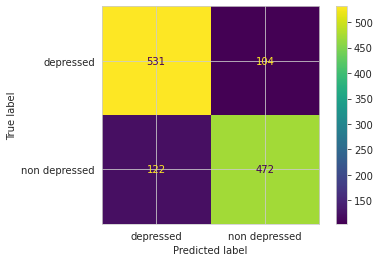

In [40]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred3 = sgd.predict(X_test)
score3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", score3)

# Print the classification report
print(classification_report(y_test, y_pred3))

# Print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['depressed', 'non depressed'])
disp3.plot()

In [41]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_pred3).ravel()
print("True Negative: ", tn3)
print("False Positive: ", fp3)
print("False Negative: ", fn3)
print("True Positive: ", tp3)

True Negative:  531
False Positive:  104
False Negative:  122
True Positive:  472


In [42]:
# Make predictions on a single tweet
tweet = ["Today is going to be a good day"]
tweet = tfidf.transform(tweet).toarray()
print(dtree.predict(tweet)) # 1 = non depressed and 0 = depressed

[1]


In [43]:
# Make predictions on a single tweet
tweet = ["Today I was very tired and stressed out"]
tweet = tfidf.transform(tweet).toarray()
print(dtree.predict(tweet)) # 1 = non depressed and 0 = depressed

[0]


# SGD Optimization

In [44]:
from sklearn.linear_model import SGDClassifier
param_grid_sgd = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'loss': ['log','hinge','modified_huber'], # logistic regression,
    'penalty': ['l2','elasticnet'],
}
sgd_clf = GridSearchCV(SGDClassifier(),param_grid=param_grid_sgd, verbose=1, cv=10, n_jobs=-1)
sgd_clf.fit(X_train, y_train)
y_pred_o3 = sgd_clf.predict(X_test)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


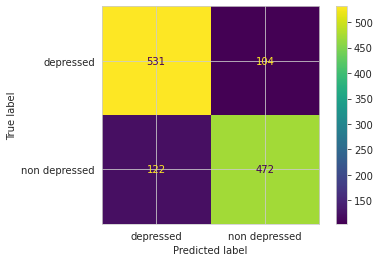

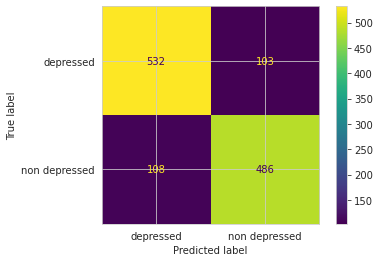

In [45]:
# Print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['depressed', 'non depressed'])
disp3.plot()

#new cm
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_o3), display_labels=['depressed', 'non depressed']).plot()

**Successfully reduced the amount of false negatives**

auc: 0.9109573424534054


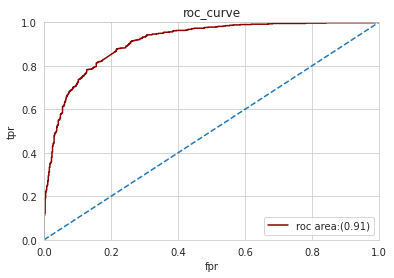

In [46]:
y_score_o3 = sgd_clf.decision_function(X_test)
make_roc(y_test,y_score_o3)

In [47]:
score_o3 = accuracy_score(y_test, y_pred_o3)
print("New SGD Accuracy:", score_o3)
print("Original SGD Accuracy: ", score3)
print("Improved SGD Accuracy by: ", score_o3-score3)

New SGD Accuracy: 0.8283157038242474
Original SGD Accuracy:  0.8161106590724166
Improved SGD Accuracy by:  0.012205044751830707
